In [2]:
from google.colab import files

uploaded = files.upload()

Saving test_tweets_anuFYb8.csv to test_tweets_anuFYb8 (1).csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import nltk

In [4]:
pd.set_option('display.max_colwidth', 200)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [5]:
train= pd.read_csv('train_E6oV3lV.csv')
test= pd.read_csv('test_tweets_anuFYb8.csv')

In [6]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [7]:
train[train['label'] == 0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [8]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [9]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [10]:
test.isnull().sum()

,0
id,0
tweet,0


In [11]:
train['label'].value_counts()

,count
label,
0,29720
1,2242


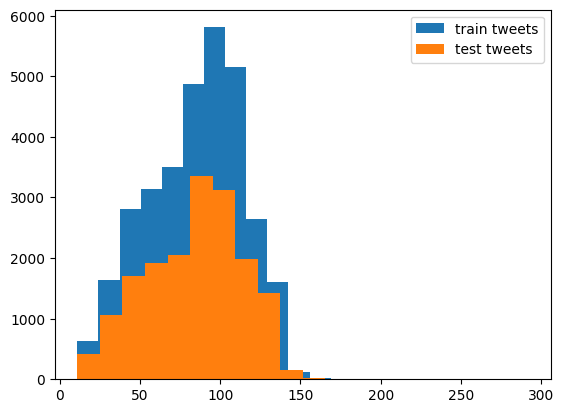

In [12]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train, bins=20, label="train tweets")
plt.hist(length_test, bins=20, label="test tweets")
plt.legend()
plt.show()

In [13]:

combi= pd.concat([train, test])

In [14]:
combi.shape

(49159, 3)

In [15]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [16]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [17]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [18]:
combi['tidy_tweet']= combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

In [19]:
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [20]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

,tidy_tweet
0,"[when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, #run]"
1,"[thanks, for, #lyft, credit, i, can, t, use, cause, they, don, t, offer, wheelchair, vans, in, pdx, #disapointed, #getthanked]"
2,"[bihday, your, majesty]"
3,"[#model, i, love, u, take, with, u, all, the, time, in, ur]"
4,"[factsguide, society, now, #motivation]"


In [21]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [22]:
for i, tweet in enumerate(tokenized_tweet):
    if any(isinstance(word, list) for word in tweet):
        print(f"Nested list at index {i}: {tweet}")


In [23]:
combi['tidy_tweet'] = [
    ' '.join(list(chain.from_iterable(tweet)) if any(isinstance(w, list) for w in tweet) else tweet)
    for tweet in tokenized_tweet
]


In [24]:


from itertools import chain

combi['tidy_tweet'] = combi['tidy_tweet'].apply(
    lambda tweet: ' '.join(list(chain.from_iterable(tweet)) if any(isinstance(w, list) for w in tweet) else tweet)
)


In [25]:
# Ensure we're working from the correct list-of-tokens column
combi['tidy_tweet'] = [' '.join(tokens) for tokens in tokenized_tweet]


In [26]:
print(type(combi['tidy_tweet'].iloc[0]))


<class 'str'>


In [27]:
print(combi['tidy_tweet'].iloc[0])


when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run


In [28]:
print(type(combi['tidy_tweet'].iloc[0]))
print(combi['tidy_tweet'].iloc[0])


<class 'str'>
when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run


In [29]:
combi['tidy_tweet']

,tidy_tweet
0,when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run
1,thank for #lyft credit i can t use caus they don t offer wheelchair van in pdx #disapoint #getthank
2,bihday your majesti
3,#model i love u take with u all the time in ur
4,factsguid societi now #motiv
...,...
17192,thought factori left right polaris #trump #uselect #leadership #polit #brexit #blm gt
17193,feel like a mermaid #hairflip #neverreadi #formal #wed #gown #dress #mermaid
17194,#hillari #campaign today in #ohio omg amp use word like asset amp liabil never onc did #clinton say thee word #radic
17195,happi at work confer right mindset lead to cultur of develop organ #work #mindset


###Tweet Sentiment Analysis – Visualization & Hashtag Insights


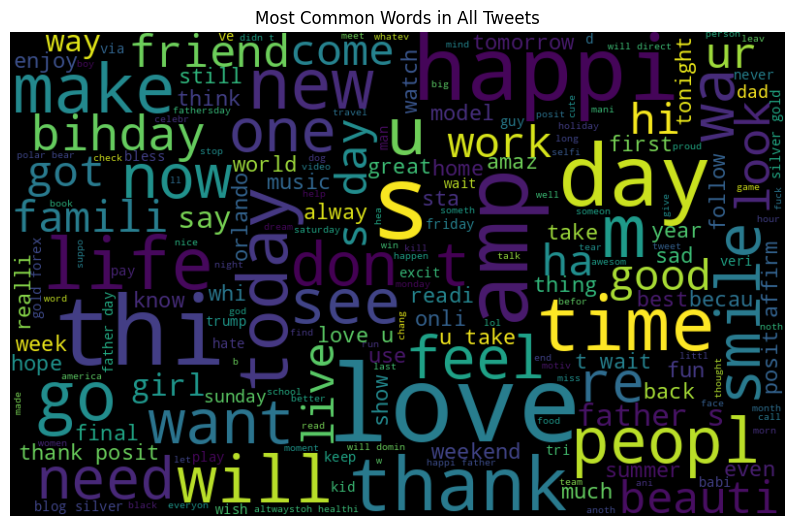

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tidy tweets into one string
all_words = ' '.join([text for text in combi['tidy_tweet']])

# Generate word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Plot
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common Words in All Tweets")
plt.show()


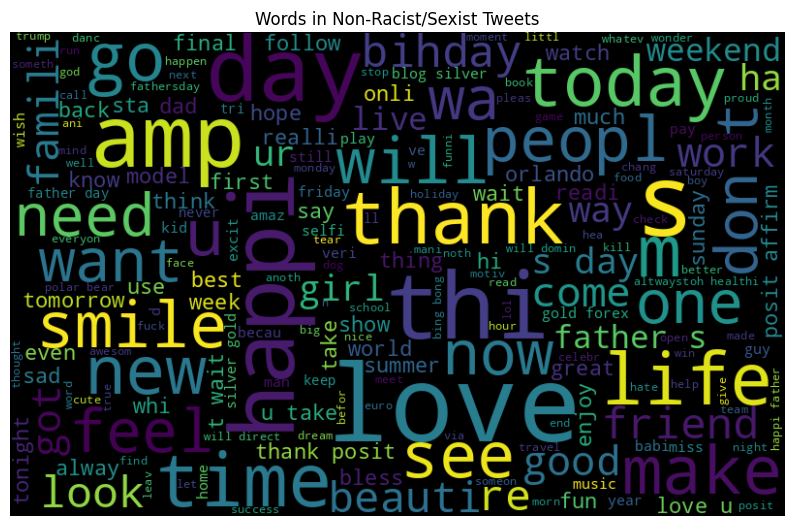

In [31]:
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Words in Non-Racist/Sexist Tweets")
plt.show()


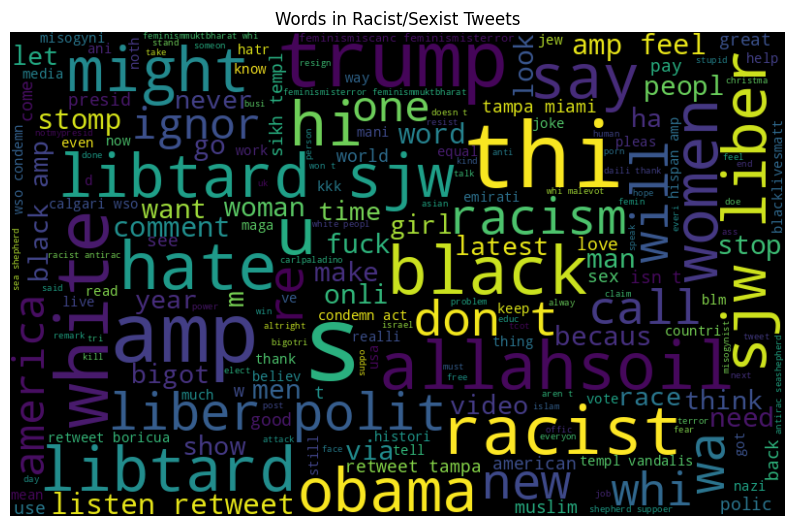

In [32]:

negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Words in Racist/Sexist Tweets")
plt.show()


In [33]:
import re

# Function to extract hashtags from each tweet
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# Extract hashtags from both categories
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# Flatten the lists
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])


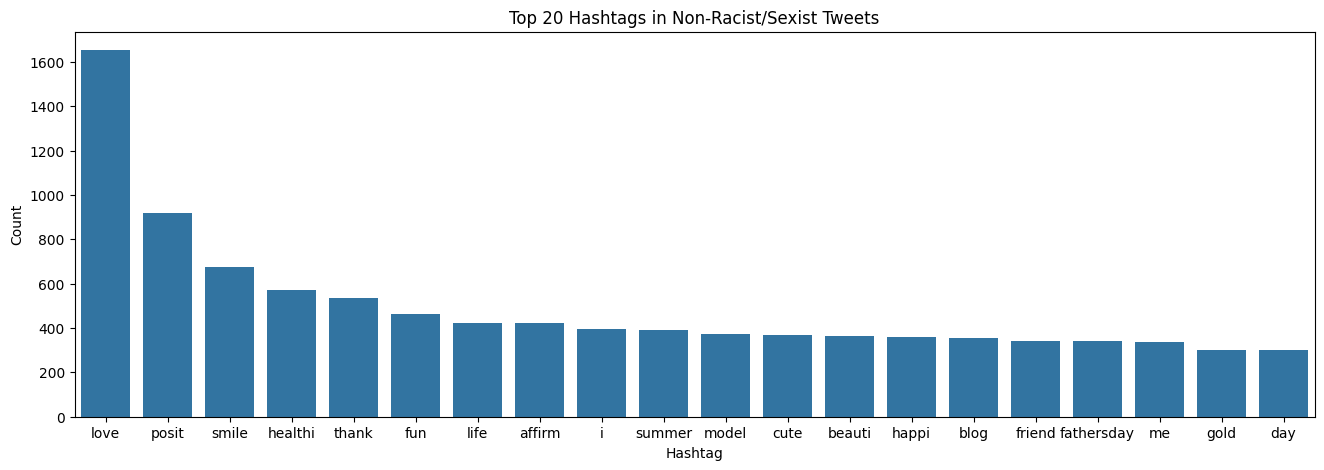

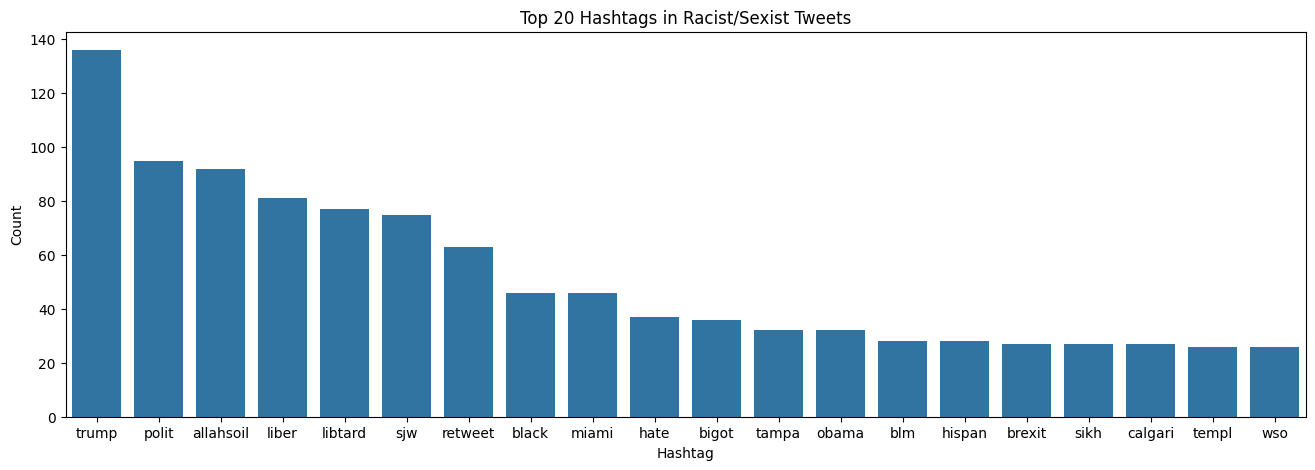

In [34]:
import pandas as pd
import seaborn as sns

# Top hashtags in non-racist/sexist tweets
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
d = d.nlargest(columns="Count", n=20)

plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.title("Top 20 Hashtags in Non-Racist/Sexist Tweets")
plt.show()

# Top hashtags in racist/sexist tweets
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
e = e.nlargest(columns="Count", n=20)

plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.title("Top 20 Hashtags in Racist/Sexist Tweets")
plt.show()


###Feature Engineering

###1.Bag-of-Words (BoW) - Converts text into fixed-length vectors based on word occurrence.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
print(bow.shape)  # (49159, 1000)


(49159, 1000)


###2. TF-IDF (Term Frequency – Inverse Document Frequency) - Gives more importance to rare but meaningful words.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
print(tfidf.shape)  # (49159, 1000)


(49159, 1000)


 ### 3.Word2Vec Embeddings - Captures semantic meaning of words using shallow neural networks.

In [37]:
!pip install gensim


In [38]:
 from gensim.models import Word2Vec

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

model_w2v = Word2Vec(
    sentences=tokenized_tweet,
    vector_size=200,
    window=5,
    min_count=2,
    sg=1,
    negative=10,
    workers=2,
    seed=34
)


To create tweet vectors (average of word vectors):

In [39]:
from itertools import chain

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: str(x).split())
tokenized_tweet = tokenized_tweet.apply(
    lambda x: list(chain.from_iterable(x)) if any(isinstance(i, list) for i in x) else x
)
tokenized_tweet = tokenized_tweet.apply(lambda x: [str(tok) for tok in x])


In [40]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from itertools import chain

# Load your data if needed (e.g., combi = pd.read_csv(...))

# Tokenization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: str(x).split())
tokenized_tweet = tokenized_tweet.apply(
    lambda x: list(chain.from_iterable(x)) if any(isinstance(i, list) for i in x) else x
)
tokenized_tweet = tokenized_tweet.apply(lambda x: [str(tok) for tok in x])


In [41]:
model_w2v = Word2Vec(
    sentences=tokenized_tweet,
    vector_size=200,     # Correct size
    window=5,
    min_count=2,
    sg=1,
    negative=10,
    workers=2,
    seed=42
)


In [42]:
import numpy as np

def get_avg_w2v(tokens, model, vector_size):
    vec = np.zeros(vector_size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    if count > 0:
        vec /= count
    return vec

vector_size = model_w2v.vector_size
tweet_vectors = np.array([
    get_avg_w2v(tokens, model_w2v, vector_size)
    for tokens in tokenized_tweet
])

print(tweet_vectors.shape)

(49159, 200)


###4. Doc2Vec Embeddings
Generates vector representations for whole documents (tweets).



In [45]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from tqdm import tqdm

def add_label(tweets):
    output = []
    for i, tweet in enumerate(tweets):
        output.append(TaggedDocument(words=tweet, tags=[f'tweet_{i}']))
    return output

labeled_tweets = add_label(tokenized_tweet)

model_d2v = Doc2Vec(
    dm=1,
    dm_mean=1,
    vector_size=200,
    window=5,
    negative=7,
    min_count=5,
    workers=3,
    seed=23
)

model_d2v.build_vocab(labeled_tweets)
model_d2v.train(labeled_tweets, total_examples=len(labeled_tweets), epochs=15)


To get tweet vectors:

In [46]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    docvec_arrays[i, :] = model_d2v.dv[f'tweet_{i}'].reshape((1, 200))

docvec_df = pd.DataFrame(docvec_arrays)
print(docvec_df.shape)  # (49159, 200)


(49159, 200)


###Modelling


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import f1_score


###MODELING



1. Logistic regression

In [48]:
train['type'] = 'train'
test['type'] = 'test'
test['label'] = np.nan  # Add dummy label for test data

combi = pd.concat([train, test], axis=0).reset_index(drop=True)


In [50]:
# Clean raw tweets into tidy_tweet column
import re
import string

def clean_tweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)  # remove @mentions
    tweet = re.sub(r'#', '', tweet)               # remove hashtag symbol
    tweet = re.sub(r'RT[\s]+', '', tweet)         # remove RT
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)  # remove hyperlinks
    tweet = re.sub(r'[^A-Za-z0-9 ]+', '', tweet)  # remove non-alphanum
    return tweet.lower()

combi['tidy_tweet'] = combi['tweet'].apply(clean_tweet)


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

train_data = combi[combi['type'] == 'train']
X_bow = CountVectorizer(max_features=5000).fit_transform(train_data['tidy_tweet'])
y = train_data['label']

X_train_bow, X_valid_bow, y_train, y_valid = train_test_split(X_bow, y, test_size=0.2, random_state=42)


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Assuming you have labeled data in combi['tidy_tweet'] and combi['label']
train_data = combi[combi['type'] == 'train']
X_bow = CountVectorizer(max_features=5000).fit_transform(train_data['tidy_tweet'])
y = train_data['label']

X_train_bow, X_valid_bow, y_train, y_valid = train_test_split(X_bow, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the tidy_tweet text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(train_data['tidy_tweet'])

# Split into training and validation sets
from sklearn.model_selection import train_test_split
X_train_tfidf, X_valid_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [56]:
wordvec_df = pd.DataFrame(tweet_vectors)  # shape: (49159, 200)


In [57]:
# Reuse train/test labels from combi
train_data = combi[combi['type'] == 'train']
y = train_data['label']

# Slice wordvec_df to match only the training portion
X_w2v = wordvec_df.iloc[:len(train_data)]

from sklearn.model_selection import train_test_split
X_train_w2v, X_valid_w2v, _, _ = train_test_split(X_w2v, y, test_size=0.2, random_state=42)


In [58]:
lr.fit(X_train_w2v, y_train)
y_pred = lr.predict(X_valid_w2v)
print("Logistic Regression (Word2Vec) F1 Score:", f1_score(y_valid, y_pred))


Logistic Regression (Word2Vec) F1 Score: 0.4634146341463415


In [60]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Only use training part for now
train_tokenized = tokenized_tweet[:len(train_data)]

# Tag each document
tagged_docs = [TaggedDocument(words=tweet, tags=[f'tweet_{i}']) for i, tweet in enumerate(train_tokenized)]



In [61]:
model_d2v = Doc2Vec(
    documents=tagged_docs,
    vector_size=200,
    window=5,
    min_count=2,
    workers=4,
    epochs=40,
    dm=1,  # Use Distributed Memory (like CBOW)
    seed=42
)


In [62]:
docvec_arrays = np.array([model_d2v.dv[f'tweet_{i}'] for i in range(len(train_data))])


In [63]:
X_d2v = docvec_arrays  # Shape: (len(train_data), 200)

X_train_d2v, X_valid_d2v, _, _ = train_test_split(X_d2v, y, test_size=0.2, random_state=42)


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# BoW
lr = LogisticRegression()
lr.fit(X_train_bow, y_train)
y_pred = lr.predict(X_valid_bow)
print("Logistic Regression (BoW) F1 Score:", f1_score(y_valid, y_pred))

# TF-IDF
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_valid_tfidf)
print("Logistic Regression (TF-IDF) F1 Score:", f1_score(y_valid, y_pred))

# Word2Vec
lr.fit(X_train_w2v, y_train)
y_pred = lr.predict(X_valid_w2v)
print("Logistic Regression (Word2Vec) F1 Score:", f1_score(y_valid, y_pred))

# Doc2Vec
lr.fit(X_train_d2v, y_train)
y_pred = lr.predict(X_valid_d2v)
print("Logistic Regression (Doc2Vec) F1 Score:", f1_score(y_valid, y_pred))


Logistic Regression (BoW) F1 Score: 0.6231292517006802
Logistic Regression (TF-IDF) F1 Score: 0.47495961227786754
Logistic Regression (Word2Vec) F1 Score: 0.4634146341463415
Logistic Regression (Doc2Vec) F1 Score: 0.29160063391442154


 2. Support Vector Machine (SVM)

In [65]:
from sklearn.svm import SVC

# BoW
svm = SVC()
svm.fit(X_train_bow, y_train)
y_pred = svm.predict(X_valid_bow)
print("SVM (BoW) F1 Score:", f1_score(y_valid, y_pred))

# TF-IDF
svm.fit(X_train_tfidf, y_train)
y_pred = svm.predict(X_valid_tfidf)
print("SVM (TF-IDF) F1 Score:", f1_score(y_valid, y_pred))

# Word2Vec
svm.fit(X_train_w2v, y_train)
y_pred = svm.predict(X_valid_w2v)
print("SVM (Word2Vec) F1 Score:", f1_score(y_valid, y_pred))

# Doc2Vec
svm.fit(X_train_d2v, y_train)
y_pred = svm.predict(X_valid_d2v)
print("SVM (Doc2Vec) F1 Score:", f1_score(y_valid, y_pred))


SVM (BoW) F1 Score: 0.512
SVM (TF-IDF) F1 Score: 0.5848484848484848
SVM (Word2Vec) F1 Score: 0.3157894736842105
SVM (Doc2Vec) F1 Score: 0.31016042780748665


3. Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

# BoW
rf = RandomForestClassifier()
rf.fit(X_train_bow, y_train)
y_pred = rf.predict(X_valid_bow)
print("Random Forest (BoW) F1 Score:", f1_score(y_valid, y_pred))

# TF-IDF
rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_valid_tfidf)
print("Random Forest (TF-IDF) F1 Score:", f1_score(y_valid, y_pred))

# Word2Vec
rf.fit(X_train_w2v, y_train)
y_pred = rf.predict(X_valid_w2v)
print("Random Forest (Word2Vec) F1 Score:", f1_score(y_valid, y_pred))

# Doc2Vec
rf.fit(X_train_d2v, y_train)
y_pred = rf.predict(X_valid_d2v)
print("Random Forest (Doc2Vec) F1 Score:", f1_score(y_valid, y_pred))


Random Forest (BoW) F1 Score: 0.6729222520107239
Random Forest (TF-IDF) F1 Score: 0.6442048517520216
Random Forest (Word2Vec) F1 Score: 0.5199362041467305
Random Forest (Doc2Vec) F1 Score: 0.13034623217922606


 4. Final Tuned XGBoost (Best with Word2Vec)

In [ ]:
import xgboost as xgb
import numpy as np

dtrain = xgb.DMatrix(X_train_w2v, label=y_train)
dvalid = xgb.DMatrix(X_valid_w2v, label=y_valid)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 8,
    'min_child_weight': 6,
    'subsample': 0.9,
    'colsample_bytree': 0.5,
    'eta': 0.1
}

xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
)

# Prediction
y_pred = xgb_model.predict(dvalid)
y_pred_final = (y_pred >= 0.3).astype(int)
print("Tuned XGBoost (Word2Vec) F1 Score:", f1_score(y_valid, y_pred_final))


[0]	Validation-auc:0.87518
[1]	Validation-auc:0.90223
[2]	Validation-auc:0.91696
[3]	Validation-auc:0.92140
[4]	Validation-auc:0.92667
[5]	Validation-auc:0.92849
[6]	Validation-auc:0.93015
[7]	Validation-auc:0.93135
[8]	Validation-auc:0.93405
[9]	Validation-auc:0.93561
[10]	Validation-auc:0.93627
[11]	Validation-auc:0.93681
[12]	Validation-auc:0.93714
[13]	Validation-auc:0.93766
[14]	Validation-auc:0.93785
[15]	Validation-auc:0.93907
[16]	Validation-auc:0.93947
[17]	Validation-auc:0.93948
[18]	Validation-auc:0.94021
[19]	Validation-auc:0.94014
[20]	Validation-auc:0.94040
[21]	Validation-auc:0.94017
[22]	Validation-auc:0.94056
[23]	Validation-auc:0.94066
[24]	Validation-auc:0.94080
[25]	Validation-auc:0.94100
[26]	Validation-auc:0.94162
[27]	Validation-auc:0.94192
[28]	Validation-auc:0.94230
[29]	Validation-auc:0.94262
[30]	Validation-auc:0.94250
[31]	Validation-auc:0.94330
[32]	Validation-auc:0.94344
[33]	Validation-auc:0.94434
[34]	Validation-auc:0.94454
[35]	Validation-auc:0.94437
[3

In [ ]:

from gensim.models import Word2Vec
import numpy as np
from itertools import chain

# Step 1: Ensure clean tokens
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: str(x).split())
tokenized_tweet = tokenized_tweet.apply(
    lambda x: list(chain.from_iterable(x)) if any(isinstance(i, list) for i in x) else x
)
tokenized_tweet = tokenized_tweet.apply(lambda x: [str(tok) for tok in x])

# Step 2: Train Word2Vec model
model_w2v = Word2Vec(
    sentences=tokenized_tweet,
    vector_size=200,
    window=5,
    min_count=2,
    sg=1,
    negative=10,
    workers=2,
    seed=34
)

# Step 3: Function to average word vectors
def get_avg_w2v(tokens, model, vector_size):
    vec = np.zeros(vector_size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    if count > 0:
        vec /= count
    return vec

# Step 4: Apply to all tweets
vector_size = model_w2v.vector_size
tweet_vectors = np.array([
    get_avg_w2v(tokens, model_w2v, vector_size)
    for tokens in tokenized_tweet
])

wordvec_df = pd.DataFrame(tweet_vectors)
print(" Word2Vec tweet embeddings shape:", wordvec_df.shape)
